In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from pprint import pprint
from scipy.signal import find_peaks

In [6]:
data_dir = r"C:\Users\yrliu98\Desktop\20250424_2step_autobot"

xy_files = list(Path(data_dir).glob("2D_PYSK_2STEP_4*.xy"))

xy_files.append(
    Path(
        r"C:\Users\yrliu98\Desktop\2025-04-03_Cyrene_test\cyrene_ACN_01_001_exported.xy"
    )
)

# to_exclude = [1, 2, 3, 5, 6, 7]

# for i in sorted(to_exclude, reverse=True):
#     xy_files.pop(i)

pprint(xy_files)

[WindowsPath('C:/Users/yrliu98/Desktop/20250424_2step_autobot/2D_PYSK_2STEP_4_A01_000_exported.xy'),
 WindowsPath('C:/Users/yrliu98/Desktop/20250424_2step_autobot/2D_PYSK_2STEP_4_A02_000_exported.xy'),
 WindowsPath('C:/Users/yrliu98/Desktop/20250424_2step_autobot/2D_PYSK_2STEP_4_A03_000_exported.xy'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025-04-03_Cyrene_test/cyrene_ACN_01_001_exported.xy')]


In [7]:
Co_K_alpha = 1.7902
Cu_K_alpha = 1.5406

dfs = []
for xy_file in xy_files:
    df = pd.read_csv(xy_file, sep=" ", skiprows=1, names=["2theta_Co", "int"])
    df = df.assign(**{"2theta_Cu": lambda x: x["2theta_Co"] * Cu_K_alpha / Co_K_alpha})

    df = df[(df["2theta_Cu"] > 5) & (df["2theta_Cu"] < 50.5)]

    peaks, _ = find_peaks(df["int"], prominence=[0.6, None])

    dfs.append(
        {"name": xy_file.stem.replace("_exported", ""), **df.to_dict(orient="list")}
    )

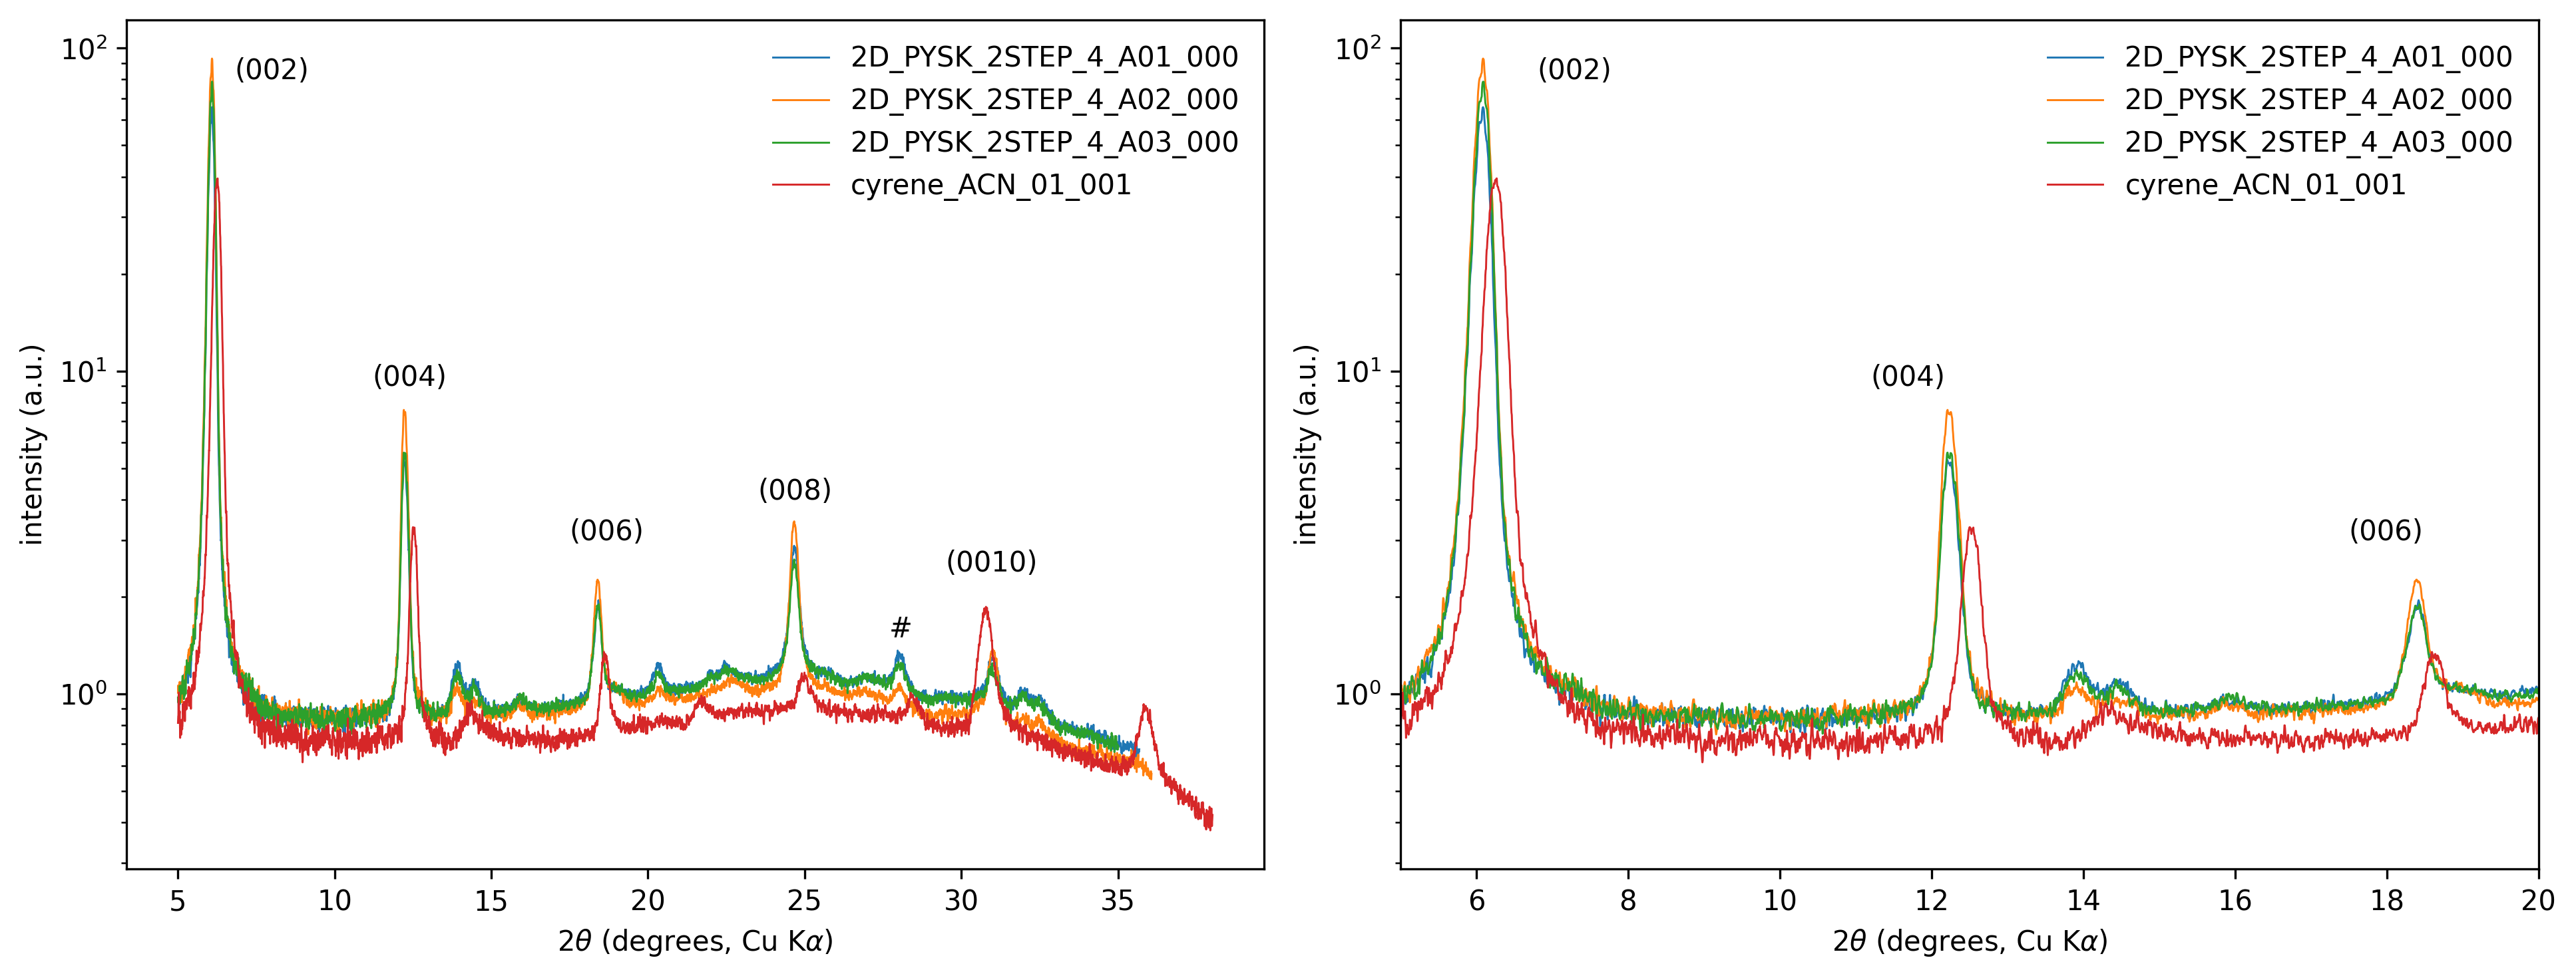

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), dpi=300, layout="tight")

for ax in axs:
    for df in dfs:
        ax.plot(df["2theta_Cu"], df["int"], label=df["name"], lw=0.7)

    handles, labels = ax.get_legend_handles_labels()
    order = []
    if len(order) == len(dfs):
        ax.legend(
            [handles[idx] for idx in order],
            [labels[idx] for idx in order],
            frameon=False,
        )
    else:
        ax.legend(frameon=False)

    ax.set_yscale("log")
    ax.set_xlabel("$2\\theta$ (degrees, Cu K$\\alpha$)")
    ax.set_ylabel("intensity (a.u.)")

    ax.text(6.8, 80, "(002)", clip_on=True)
    ax.text(11.2, 9, "(004)", clip_on=True)
    ax.text(17.5, 3, "(006)", clip_on=True)
    ax.text(23.5, 4, "(008)", clip_on=True)
    ax.text(29.5, 2.4, "(0010)", clip_on=True)

    ax.text(27.7, 1.5, "#", clip_on=True)

axs[1].set_xlim(5, 20)

fig.savefig(Path(data_dir, "compare_1step_plot.jpg"))

In [8]:
import xylib
from pathlib import Path

data_dir = Path(r"G:\My Drive\XRD\20250702_S_MeO")

merge_raw_files = list(data_dir.glob("*_merge.raw"))


def export_metadata(f, meta):
    for i in range(meta.size()):
        key = meta.get_key(i)
        value = meta.get(key)
        f.write("# %s: %s\n" % (key, value.replace("\n", "\n#\t")))


def convert_raw_to_xy(raw_file, filetype="", store_meta=True):
    d = xylib.load_file(str(raw_file), filetype)
    output_file = raw_file.with_suffix(".xy")
    with open(output_file, "w") as f:
        f.write("# exported by xylib from a %s file\n" % d.fi.name)
        # output the file-level meta-info
        if store_meta and d.meta.size():
            export_metadata(f, d.meta)
            f.write("\n")
        nb = d.get_block_count()
        for i in range(nb):
            block = d.get_block(i)
            if nb > 1 or block.get_name():
                f.write("\n### block #%d %s\n" % (i, block.get_name()))
            if store_meta:
                export_metadata(f, block.meta)

            ncol = block.get_column_count()
            # column 0 is pseudo-column with point indices, we skip it
            col_names = [
                block.get_column(k).get_name() or ("column_%d" % k)
                for k in range(1, ncol + 1)
            ]
            f.write("# " + "\t".join(col_names) + "\n")
            nrow = block.get_point_count()
            for j in range(nrow):
                values = [
                    "%.6f" % block.get_column(k).get_value(j)
                    for k in range(1, ncol + 1)
                ]
                f.write("\t".join(values) + "\n")

    return output_file


xy_files = []
for raw_file in merge_raw_files:
    print(f"Converting {raw_file} to .xy")
    xy_files.append(convert_raw_to_xy(raw_file))

print(xy_files)

Converting G:\My Drive\XRD\20250702_S_MeO\S_MeO_A01_merge.raw to .xy
Converting G:\My Drive\XRD\20250702_S_MeO\S_MeO_A02_merge.raw to .xy
Converting G:\My Drive\XRD\20250702_S_MeO\S_MeO_A03_merge.raw to .xy
Converting G:\My Drive\XRD\20250702_S_MeO\S_MeO_A04_merge.raw to .xy
Converting G:\My Drive\XRD\20250702_S_MeO\S_MeO_B01_merge.raw to .xy
Converting G:\My Drive\XRD\20250702_S_MeO\S_MeO_B02_merge.raw to .xy
Converting G:\My Drive\XRD\20250702_S_MeO\S_MeO_B03_merge.raw to .xy
[WindowsPath('G:/My Drive/XRD/20250702_S_MeO/S_MeO_A01_merge.xy'), WindowsPath('G:/My Drive/XRD/20250702_S_MeO/S_MeO_A02_merge.xy'), WindowsPath('G:/My Drive/XRD/20250702_S_MeO/S_MeO_A03_merge.xy'), WindowsPath('G:/My Drive/XRD/20250702_S_MeO/S_MeO_A04_merge.xy'), WindowsPath('G:/My Drive/XRD/20250702_S_MeO/S_MeO_B01_merge.xy'), WindowsPath('G:/My Drive/XRD/20250702_S_MeO/S_MeO_B02_merge.xy'), WindowsPath('G:/My Drive/XRD/20250702_S_MeO/S_MeO_B03_merge.xy')]


In [ ]:
Co_K_alpha = 1.7902
Cu_K_alpha = 1.5406

dfs = []
for xy_file in xy_files:
    two_theta_Co_col = f"2theta_Co_{xy_file.stem}"
    int_col = f"int_{xy_file.stem}"

    df = pd.read_csv(xy_file, sep="\t", comment="#", names=[two_theta_Co_col, int_col])
    df = df.assign(
        **{"2theta_Cu": lambda x: x[two_theta_Co_col] * Cu_K_alpha / Co_K_alpha}
    )
    df = df.set_index("2theta_Cu")
    df = df[(df.index > 4) & (df.index < 50.5)]
    # peaks, _ = find_peaks(df[int_col], prominence=[0.6, None])
    dfs.append(df)

df = pd.concat(dfs, axis=1)

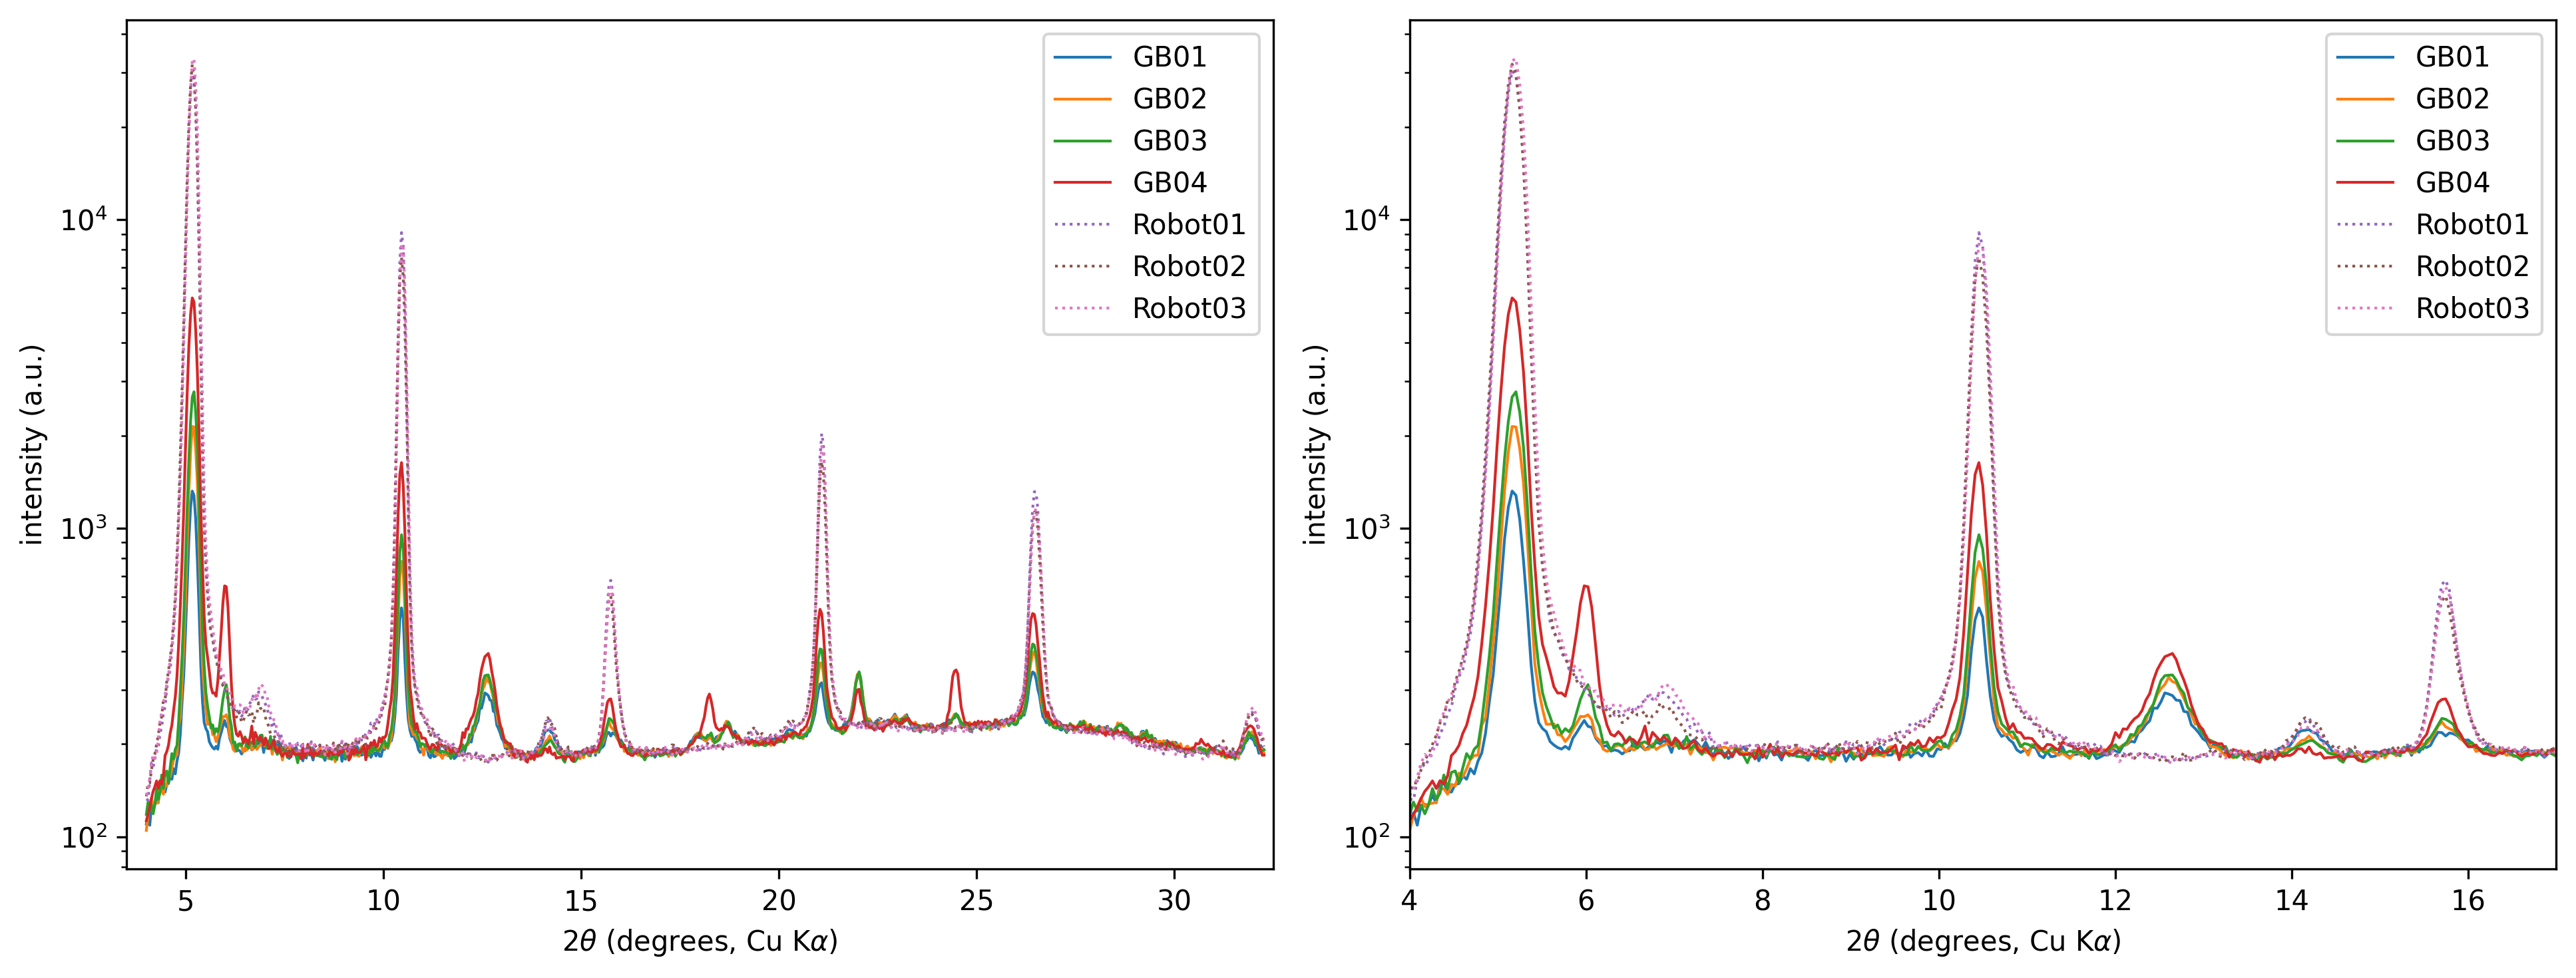

In [49]:
def get_label(name):
    name = name.replace("int_", "").replace("_merge", "")

    if name.startswith("S_MeO_A"):
        return name.replace("S_MeO_A", "GB")

    if name.startswith("S_MeO_B"):
        return name.replace("S_MeO_B", "Robot")

    raise ValueError(f"Unknown label for {name}")


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), dpi=300, layout="tight")
axs[0].set_xlim(3.5, 32.5)

for ax in axs:
    for intensity_col in [col for col in df.columns if col.startswith("int_")]:
        df_to_plot = df[[intensity_col]].dropna()
        label = get_label(intensity_col)
        ax.plot(
            df_to_plot.index,
            df_to_plot[intensity_col],
            label=get_label(intensity_col),
            lw=1,
            linestyle="-" if label.startswith("GB") else ":",
        )

    ax.set_yscale("log")
    ax.set_xlabel("$2\\theta$ (degrees, Cu K$\\alpha$)")
    ax.set_ylabel("intensity (a.u.)")
    ax.legend()

axs[1].set_xlim(4, 17)

fig.savefig(Path(data_dir, f"{data_dir.stem}.jpg"))

In [2]:
from pathlib import Path

data_dir = Path(r"G:\My Drive\LPS\20250709_S_MeOMBAI_prestudy_2\XRD")

xy_files = list(data_dir.glob("*exported.xy"))

print(xy_files)

[WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/XRD/20250709_S_MeO_A02_000_exported.xy'), WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/XRD/20250709_S_MeO_A03_000_exported.xy'), WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/XRD/20250709_S_MeO_B01_000_exported.xy'), WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/XRD/20250709_S_MeO_B02_000_exported.xy'), WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/XRD/20250709_S_MeO_B03_000_exported.xy'), WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/XRD/20250709_S_MeO_2_A01_001_exported.xy'), WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/XRD/20250709_S_MeO_2_A02_001_exported.xy'), WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/XRD/20250709_S_MeO_2_A03_001_exported.xy'), WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/XRD/20250709_S_MeO_A01_000_exported.xy')]


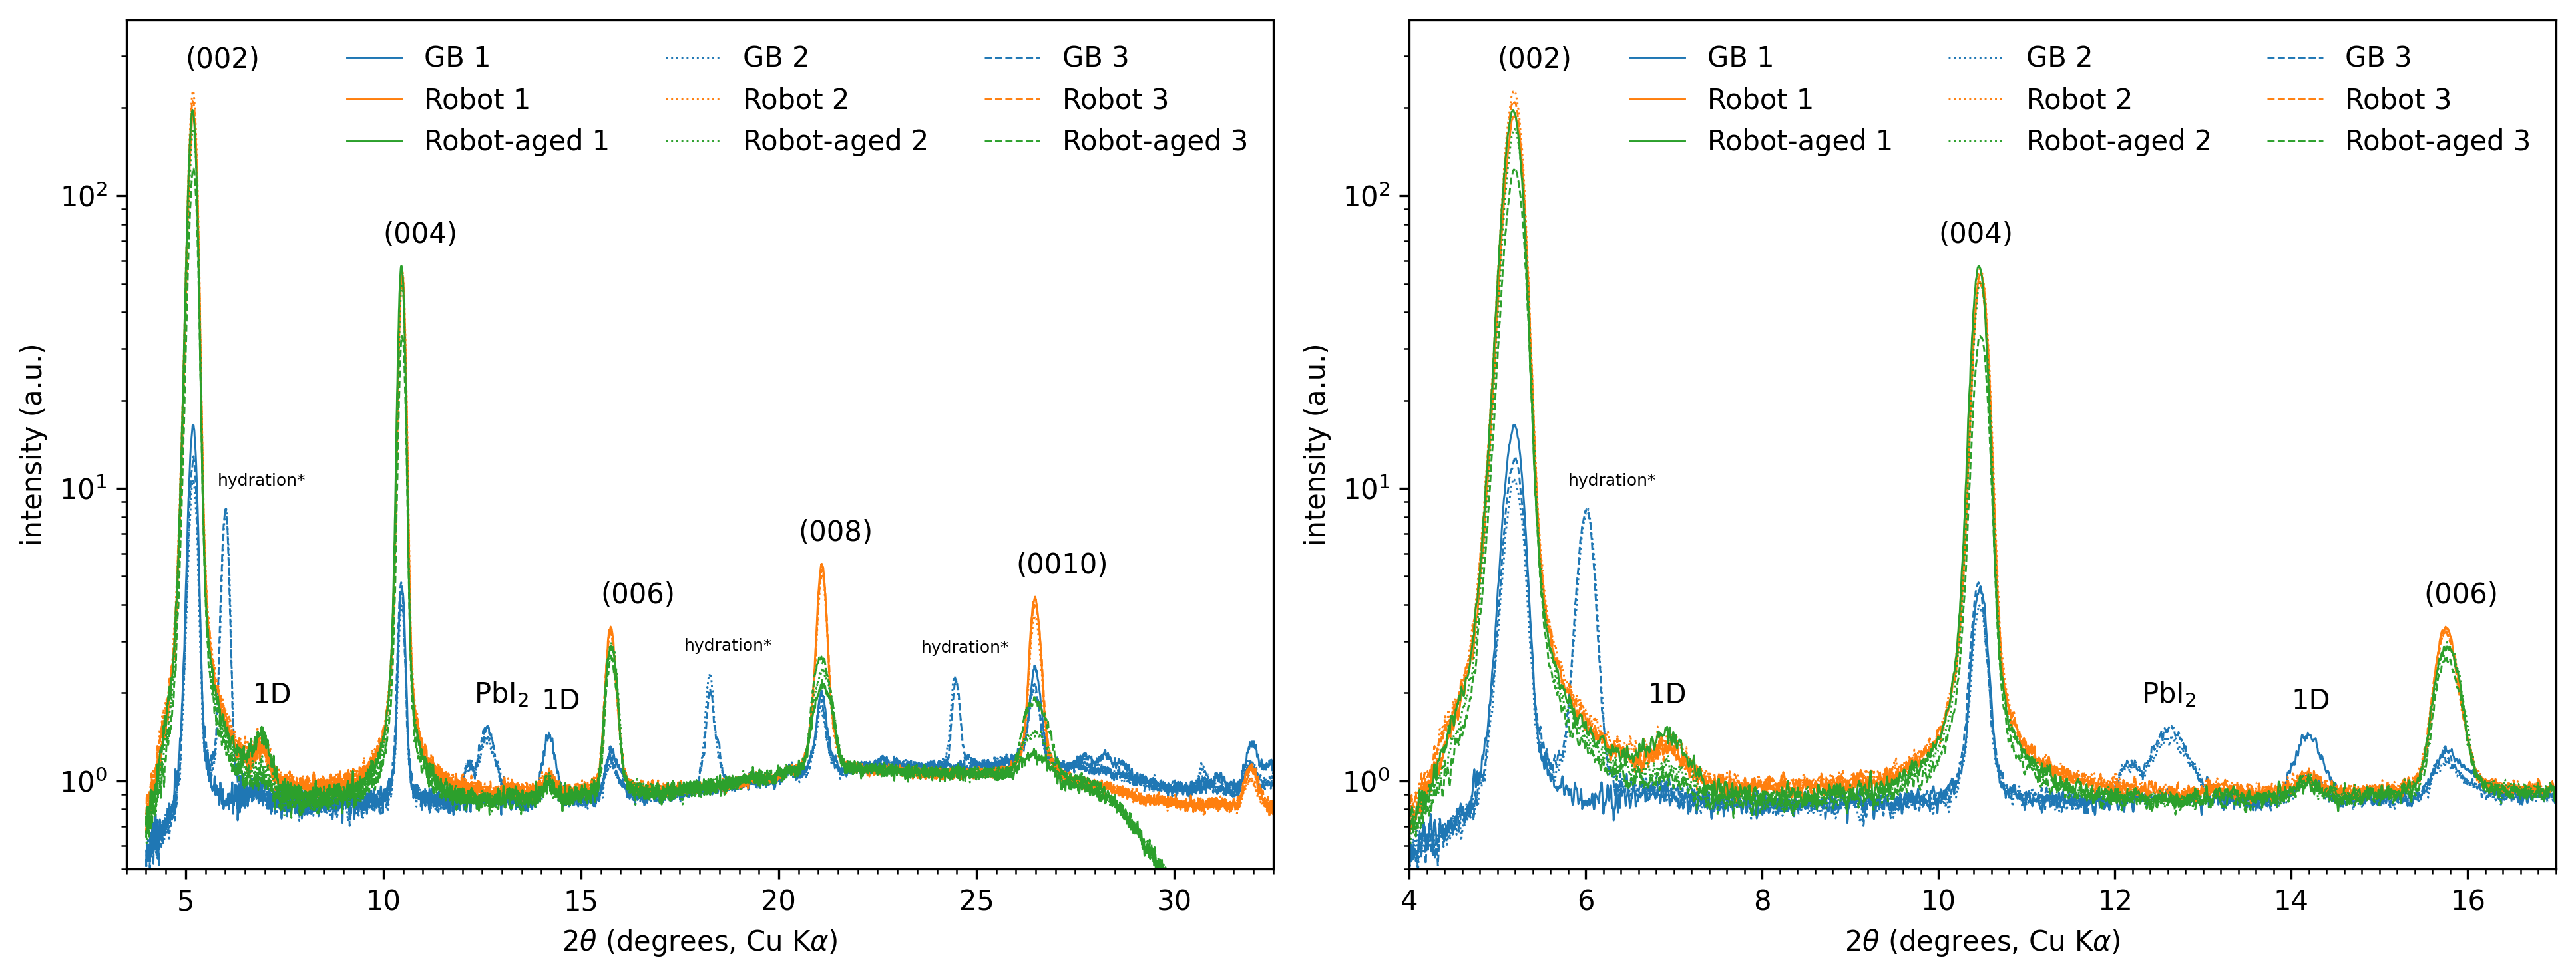

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


def get_label(filename):
    mapping = {
        "20250709_S_MeO_A01_000_exported": "GB 1",
        "20250709_S_MeO_A02_000_exported": "GB 2",
        "20250709_S_MeO_A03_000_exported": "GB 3",
        "20250709_S_MeO_B01_000_exported": "Robot 1",
        "20250709_S_MeO_B02_000_exported": "Robot 2",
        "20250709_S_MeO_B03_000_exported": "Robot 3",
        "20250709_S_MeO_2_A01_001_exported": "Robot-aged 1",
        "20250709_S_MeO_2_A02_001_exported": "Robot-aged 2",
        "20250709_S_MeO_2_A03_001_exported": "Robot-aged 3",
    }
    try:
        return "int_" + mapping[filename.removeprefix("int_")]
    except KeyError:
        return filename


def get_linestyle_func():
    # Create a linestyle mapping using closure with dict for prefix tracking
    linestyles = ["-", ":", "--", "-."]
    used_prefixes = set()
    linestyle_iter = iter(linestyles)

    def get_linestyle_for_label(label):
        nonlocal linestyle_iter
        # Extract prefix from label (everything before the first space or underscore)
        if " " in label:
            prefix = label.split(" ")[0]
        elif "_" in label:
            prefix = label.split("_")[0]
        else:
            prefix = label

        # If prefix not seen before, assign new linestyle
        if prefix not in used_prefixes:
            used_prefixes.add(prefix)
            linestyle_iter = iter(linestyles)

        try:
            return next(linestyle_iter)
        except StopIteration:
            # If we run out of linestyles, loop back to the start
            linestyle_iter = iter(linestyles)
            return next(linestyle_iter)

    return get_linestyle_for_label


def get_color_func():
    # Create a color mapping using closure with set for prefix tracking
    dark2_colors = plt.colormaps.get_cmap("tab10").colors
    prefix_colors = {}
    used_prefixes = set()

    def get_color_for_label(label):
        # Extract prefix from label (everything before the first space or underscore)
        if " " in label:
            prefix = label.split(" ")[0]
        elif "_" in label:
            prefix = label.split("_")[0]
        else:
            prefix = label

        # If prefix not seen before, assign new color
        if prefix not in used_prefixes:
            used_prefixes.add(prefix)
            color_index = len(used_prefixes) - 1
            prefix_colors[prefix] = dark2_colors[color_index % len(dark2_colors)]

        return prefix_colors[prefix]

    return get_color_for_label


def add_peak_label(
    ax, df, x, text, x_range=1.0, y_offset=None, log_scale=None, fontdict=None
):
    """
    Add a text label to the axis at the given x position.
    The y position is set to the max y value within ±x_range of x across all int_ columns, plus y_offset.

    Parameters:
    - log_scale: If True, treats y_offset as a multiplicative factor for log scale.
                 If False, treats y_offset as an additive offset for linear scale.
    """

    if log_scale is None:
        log_scale = ax.get_yscale() == "log"

    if y_offset is None:
        y_offset = 1.2 if log_scale else 20

    # Filter rows within the x range
    mask = (df.index > (x - x_range)) & (df.index < (x + x_range))
    if mask.any():
        # Get all intensity columns (starting with "int_")
        int_cols = [col for col in df.columns if col.startswith("int_")]
        # Find the maximum y value across all intensity columns within the range
        y_max = df.loc[mask, int_cols].max().max()

        if log_scale:
            # For log scale, multiply by offset factor to get consistent visual spacing
            y_text = y_max * y_offset
        else:
            # For linear scale, add offset
            y_text = y_max + y_offset

        ax.text(
            x, y_text, text, clip_on=True, fontdict=fontdict
        )  # Use fontdict if provided
    else:
        fallback_y = y_offset if not log_scale else y_offset
        ax.text(
            x, fallback_y, text, clip_on=True, fontdict=fontdict
        )  # fallback if no data in range


Co_K_alpha = 1.7902
Cu_K_alpha = 1.5406

dfs = []
for xy_file in xy_files:
    two_theta_Co_col = f"2theta_Co_{xy_file.stem}"
    int_col = f"int_{xy_file.stem}"

    df = pd.read_csv(xy_file, sep=" ", skiprows=1, names=[two_theta_Co_col, int_col])
    df = df.assign(
        **{"2theta_Cu": lambda x: x[two_theta_Co_col] * Cu_K_alpha / Co_K_alpha}
    )
    df = df.set_index("2theta_Cu")
    df = df[(df.index > 4) & (df.index < 50.5)]
    # peaks, _ = find_peaks(df[int_col], prominence=[0.6, None])
    # df[int_col] = gaussian_filter1d(df[int_col], sigma=10)
    dfs.append(df)

df = pd.concat(dfs, axis=1)

df = df.rename(columns=get_label)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), dpi=300, layout="tight")
axs[0].set_xlim(3.5, 32.5)

colums_to_plot = [
    "GB 1",
    "GB 2",
    "GB 3",
    "Robot 1",
    "Robot 2",
    "Robot 3",
    "Robot-aged 1",
    "Robot-aged 2",
    "Robot-aged 3",
]

for ax in axs:
    get_color = get_color_func()
    get_linestyle = get_linestyle_func()
    for intensity_col in [
        col
        for col in sorted(df.columns)
        if col.startswith("int_") and col.removeprefix("int_") in colums_to_plot
    ]:
        df_to_plot = df[[intensity_col]].dropna()
        ax.plot(
            df_to_plot.index,
            df_to_plot[intensity_col],
            label=intensity_col.removeprefix("int_"),
            lw=0.7,
            linestyle=get_linestyle(intensity_col),
            color=get_color(intensity_col),
        )

    ax.set_yscale("log")
    ax.set_xlabel("$2\\theta$ (degrees, Cu K$\\alpha$)")
    ax.set_ylabel("intensity (a.u.)")
    ax.set_ylim(0.5, ax.get_ylim()[1])  # Set y-limits to start from 0.1
    ax.legend()

    handles, labels = ax.get_legend_handles_labels()
    order = sorted(range(len(labels)), key=lambda i: (i % 3))
    legend = ax.legend(
        ncols=3,
        handles=[handles[idx] for idx in order],
        labels=[labels[idx] for idx in order],
        framealpha=0,
    )

    ax.minorticks_on()
    from matplotlib.ticker import AutoMinorLocator

    minor_locator = AutoMinorLocator(10)
    ax.xaxis.set_minor_locator(minor_locator)

    # ax.grid(visible=True, which="major", axis="x", color="gray", linestyle="-", linewidth=0.3)
    # ax.grid(visible=True, which="minor", axis="x", color="gray", linestyle="-", linewidth=0.1)

    add_peak_label(ax, df, 5, "(002)")
    add_peak_label(ax, df, 10, "(004)")
    add_peak_label(ax, df, 15.5, "(006)")
    add_peak_label(ax, df, 20.5, "(008)")
    add_peak_label(ax, df, 26, "(0010)")

    add_peak_label(ax, df, 5.8, "hydration*", x_range=0.3, fontdict={"size": 6})
    add_peak_label(ax, df, 17.6, "hydration*", fontdict={"size": 6})
    add_peak_label(ax, df, 23.6, "hydration*", fontdict={"size": 6})
    add_peak_label(ax, df, 12.3, "$\mathregular{PbI_2}$")

    add_peak_label(ax, df, 6.7, "1D", x_range=0.3)
    add_peak_label(ax, df, 14, "1D", x_range=0.3)


axs[1].set_xlim(4, 17)

fig.savefig(Path(data_dir, f"{data_dir.parent.stem}-all.jpg"))